In [88]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import pandas as pd
import seaborn as sn

In [2]:
df = pd.read_csv("monthly-temperature-anomalies.csv")

In [3]:
df.head()

Entity Code        Day  Temperature anomaly
0  Afghanistan  AFG  1/15/1940            -0.789031
1  Afghanistan  AFG  1/15/1941            -1.396584
2  Afghanistan  AFG  1/15/1942             0.578502
3  Afghanistan  AFG  1/15/1943            -2.199642
4  Afghanistan  AFG  1/15/1944            -0.124263

In [6]:
df["date"] = pd.to_datetime(df["Day"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196950 entries, 0 to 196949
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Entity               196950 non-null  object        
 1   Code                 196950 non-null  object        
 2   Day                  196950 non-null  object        
 3   Temperature anomaly  196950 non-null  float64       
 4   date                 196950 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 7.5+ MB


In [8]:
df.head()

Entity Code        Day  Temperature anomaly       date
0  Afghanistan  AFG  1/15/1940            -0.789031 1940-01-15
1  Afghanistan  AFG  1/15/1941            -1.396584 1941-01-15
2  Afghanistan  AFG  1/15/1942             0.578502 1942-01-15
3  Afghanistan  AFG  1/15/1943            -2.199642 1943-01-15
4  Afghanistan  AFG  1/15/1944            -0.124263 1944-01-15

In [113]:
df2 = df[
    (df["date"] > "2010-01-01")
    & (
        df["Entity"].isin(
            [
                "Afghanistan",
                "Albania",
                "Algeria",
                "American Samoa",
                "Andorra",
                "Angola",
                "Anguilla",
                "Antigua and Barbuda",
                "Argentina",
                "Armenia",
                "Australia",
                "Austria",
                "Azerbaijan",
                "Bahamas",
                "Bahrain",
                "Bangladesh",
                "Belarus",
                "Belgium",
                "Belize",
                "Benin",
            ]
        )
    )
]

In [16]:
df2.head(5)

Entity Code        Day  Temperature anomaly       date
70  Afghanistan  AFG  1/15/2010             2.642363 2010-01-15
71  Afghanistan  AFG  1/15/2011             0.732586 2011-01-15
72  Afghanistan  AFG  1/15/2012            -1.712392 2012-01-15
73  Afghanistan  AFG  1/15/2013            -0.446632 2013-01-15
74  Afghanistan  AFG  1/15/2014             0.809244 2014-01-15

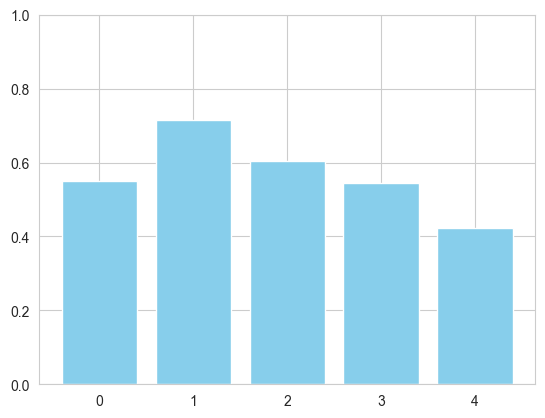

In [83]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Setting Seaborn style
sns.set_style("whitegrid")

# Generating example data
np.random.seed(0)
n_bars = 5
data = np.random.rand(10, n_bars)

# Creating the figure and a bar plot
fig, ax = plt.subplots()
bar_container = ax.bar(range(n_bars), data[0, :], color="skyblue")

# Setting the axes limits
ax.set_ylim(0, 1)


def animate(i):
    # Updating the data of each bar
    for bar, new_data in zip(bar_container.patches, data[i, :]):
        bar.set_height(new_data)
    return bar_container.patches


# Creating the animation
anim = FuncAnimation(fig, animate, frames=len(data), interval=200, blit=True)

# Saving the animation
# anim.save('/mnt/data/animated_barplot.gif', writer='imagemagick', fps=5)

# Displaying the animation
# plt.show()
# HTML(anim.to_jshtml())

In [17]:
df2.Entity.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin'],
      dtype=object)

In [18]:
df2.shape

(3400, 5)

In [40]:
df2.loc[:, "date_rank"] = df2["date"].rank(method="dense").astype(int)
df2.head()

Entity Code        Day  Temperature anomaly       date  date_rank
70  Afghanistan  AFG  1/15/2010             2.642363 2010-01-15          1
71  Afghanistan  AFG  1/15/2011             0.732586 2011-01-15         13
72  Afghanistan  AFG  1/15/2012            -1.712392 2012-01-15         25
73  Afghanistan  AFG  1/15/2013            -0.446632 2013-01-15         37
74  Afghanistan  AFG  1/15/2014             0.809244 2014-01-15         49

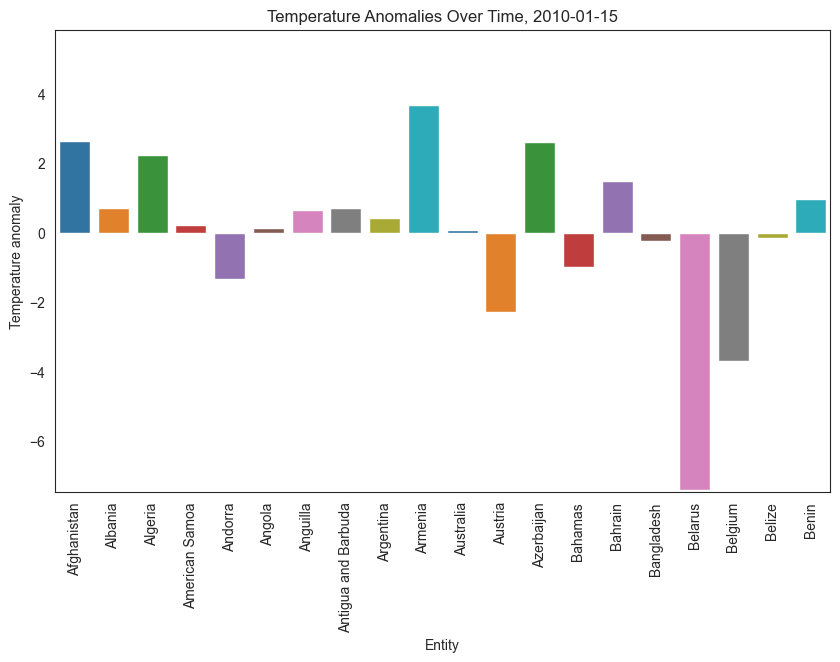

In [112]:
fig, ax = plt.subplots(figsize=(10, 6))
# Setting the title and labels
ax.set_title("Temperature Anomalies Over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Temperature Anomaly")


max_index = df2["date_rank"].max()


def animate(i):
    ax.clear()
    sns.set_style("whitegrid")
    i += 1
    current_df = df2[df2["date_rank"] == i]  # .sort_values(by=['Temperature anomaly'])

    sn.barplot(
        x="Entity",
        y="Temperature anomaly",
        data=current_df,
        palette="tab10",
        hue="Entity",
    )
    dt = current_df.reset_index().loc[0, "date"].strftime("%Y-%m-%d")
    ax.set_ylim(df2["Temperature anomaly"].min(), df2["Temperature anomaly"].max())
    ax.set_title(f"Temperature Anomalies Over Time, {dt}")
    ax.tick_params(axis="x", rotation=90)


# animate(12)

# Creating the animation
anim = FuncAnimation(fig, animate, frames=max_index, interval=200, repeat=False)

plt.close()  # Prevents the static plot from showing up
HTML(anim.to_jshtml())